In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim

$$ \vec{r}(t) = Acos(\omega t)i + Asin(\omega t) j$$

In [2]:
A = 1
omega = 2*np.pi/10
N = 200

In [3]:
t = np.linspace(0, 10, N)
r = np.zeros((N, 2))


def get_position() -> np.ndarray:
    r[:, 0] = A*np.cos(omega*t)
    r[:, 1] = A*np.sin(omega*t)
    return r


def get_velocity() -> np.ndarray:
    v = np.zeros((N, 2))
    v[:, 0] = -A*omega*np.sin(omega*t)
    v[:, 1] = A*omega*np.cos(omega*t)
    return v

r = get_position()
v = get_velocity()


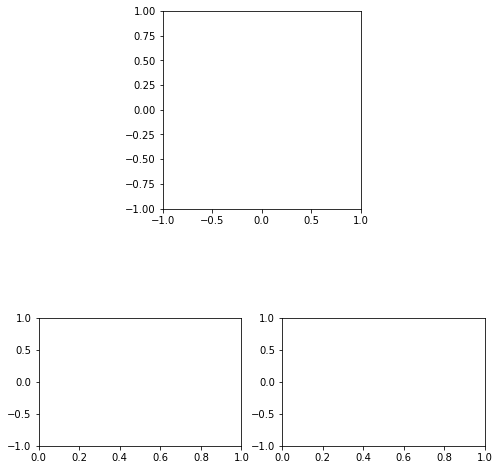

In [4]:
fig = plt.figure(figsize=(8, 8))
axl = fig.add_subplot(3, 2, 5)
ax2 = fig.add_subplot(3, 2, 6)
ax3 = fig.add_subplot(2, 1, 1)


def init():
    axl.set_ylim(-A, A)
    ax2.set_ylim(-A, A)

    ax3.set_ylim(-A, A)
    ax3.set_xlim(-A, A)

    ax3.set_aspect('equal')


def update(i):
    plot = axl.clear()
    plot = ax2.clear()
    plot = ax3.clear()
    init()
    plot = axl.plot(t[:i], r[:i, 0])
    plot = ax2.plot(t[:i], r[:i, 1])
    plot = ax3.arrow(0, 0, r[i, 0], r[i, 1], color='b', label='Position')
    plot = ax3.arrow(r[i, 0], r[i, 1], v[i, 0], v[i, 1],
                     color='g', label='Velocity')

    plot = ax3.legend(loc=1)
    return plot


Animation = anim.FuncAnimation(fig, update, frames=N, init_func=init)


In [5]:
writer = anim.writers['ffmpeg'](fps=15)
Animation.save('MovimientoCirculas.mp4', writer=writer)